# Task2 Results: Large-Scale TSP Experiments

This notebook presents experiments on the large-scale TSP problem defined in `task2_large_scale.py`. 
In this problem, we have:
- 100 original customers
- Another 100 customers generated by shifting the x-coordinates by 100
- KMeans clustering to divide the 200 customers into sub-regions
- A local TSP solver (GA) for each sub-region
- Finally, we combine the local routes into a global route.

## 1. Environment Setup

Let's import the necessary libraries and configure the Python environment.


In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import matplotlib.pyplot as plt

## 2. Import the Large-Scale TSP function

We'll use the `run_large_scale_tsp` function from `task2_large_scale.py`.


In [2]:
from src.tasks.task2_large_scale import run_large_scale_tsp
tsp_file = os.path.abspath(os.path.join(module_path, "data", "TSP.csv"))
print("TSP file path:", tsp_file)

TSP file path: C:\Robbie\1 Program\1-2 COMP6707 ADVANCED COMPUTATIONAL INTELLIGENCE\COMP6707-Project\COMP6707_Project_24037513R\data\TSP.csv


### 2.1 Single Experiment with Default Parameters

Let's run one experiment using default or nominal parameters: 
- `pop_size_local = 50`
- `max_gen_local = 200`
- `n_clusters = 4`


In [3]:
result_1 = run_large_scale_tsp(tsp_file, pop_size_local=50, max_gen_local=200, n_clusters=4)
print(f"Global route distance: {result_1['global_distance']:.4f}")
print("Global route (first 20 indices):", result_1["global_route"][:20], "...")

C:\Users\User\anaconda3\envs\py39_env\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\User\anaconda3\envs\py39_env\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\User\anaconda3\envs\py39_env\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\User\anaconda3\envs\py39_env\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\User\anaconda3\envs\py39_env\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


Global route distance: 1325.4233
Global route (first 20 indices): [2, 6, 19, 67, 82, 21, 95, 43, 62, 34, 97, 1, 27, 89, 96, 26, 52, 15, 87, 29] ...


The result includes a global route of length 200, plus the global distance. We can visualize it with the plotting function.


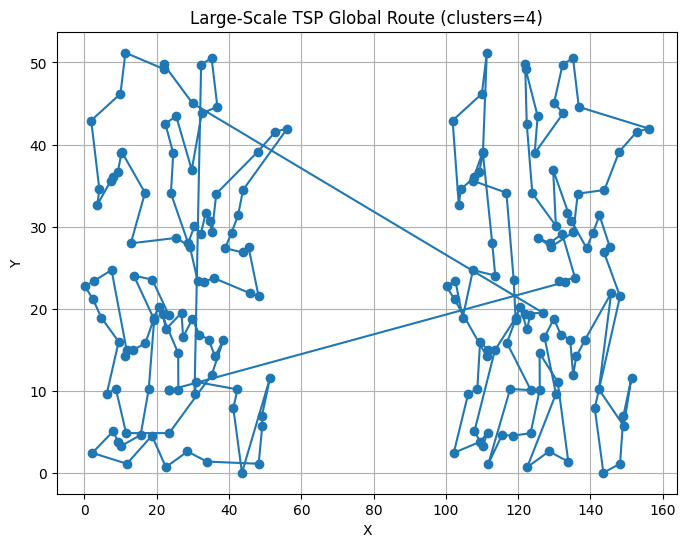

In [4]:
from src.utils.visualization import plot_tsp_route
plot_tsp_route(result_1["full_coords"], result_1["global_route"], 
               title="Large-Scale TSP Global Route (clusters=4)", show=True)

## 3. Parameter Study: Number of Clusters, Local GA Population, and Generations

We can investigate how changing the number of clusters (`n_clusters`) or local GA parameters (`pop_size_local`, `max_gen_local`) influences the final global distance. We'll do a small grid search:
- n_clusters in {2, 4, 6}
- pop_size_local in {50, 100}
- max_gen_local in {100, 200}

We'll record results in a table.


In [8]:
experiment_records = []
cluster_choices = [2, 4, 6]
pop_sizes_local = [50, 100]
max_gens_local = [100, 200]

for nc in cluster_choices:
    for psl in pop_sizes_local:
        for mgl in max_gens_local:
            print(f"Running Large-Scale TSP with n_clusters={nc}, pop_size_local={psl}, max_gen_local={mgl}")
            res = run_large_scale_tsp(tsp_file, 
                                      pop_size_local=psl, 
                                      max_gen_local=mgl, 
                                      n_clusters=nc)
            experiment_records.append({
                "n_clusters": nc,
                "pop_size_local": psl,
                "max_gen_local": mgl,
                "global_distance": res["global_distance"]
            })


Running Large-Scale TSP with n_clusters=2, pop_size_local=50, max_gen_local=100
Running Large-Scale TSP with n_clusters=2, pop_size_local=50, max_gen_local=200
Running Large-Scale TSP with n_clusters=2, pop_size_local=100, max_gen_local=100
Running Large-Scale TSP with n_clusters=2, pop_size_local=100, max_gen_local=200
Running Large-Scale TSP with n_clusters=4, pop_size_local=50, max_gen_local=100
Running Large-Scale TSP with n_clusters=4, pop_size_local=50, max_gen_local=200
Running Large-Scale TSP with n_clusters=4, pop_size_local=100, max_gen_local=100
Running Large-Scale TSP with n_clusters=4, pop_size_local=100, max_gen_local=200
Running Large-Scale TSP with n_clusters=6, pop_size_local=50, max_gen_local=100
Running Large-Scale TSP with n_clusters=6, pop_size_local=50, max_gen_local=200
Running Large-Scale TSP with n_clusters=6, pop_size_local=100, max_gen_local=100
Running Large-Scale TSP with n_clusters=6, pop_size_local=100, max_gen_local=200


### 3.1 Summarize the Results in a Table

In [10]:
import pandas as pd
df_results = pd.DataFrame(experiment_records)
df_results

,n_clusters,pop_size_local,max_gen_local,global_distance
0,2,50,100,2312.936275
1,2,50,200,2171.280895
2,2,100,100,2281.868919
3,2,100,200,2152.295962
4,4,50,100,1308.068670
5,4,50,200,1294.696144
6,4,100,100,1324.540843
7,4,100,200,1307.463329
8,6,50,100,1250.918339
9,6,50,200,1246.608688


### 3.2 Visualization of Results

We can quickly plot how `global_distance` changes with `n_clusters` and local GA parameters.

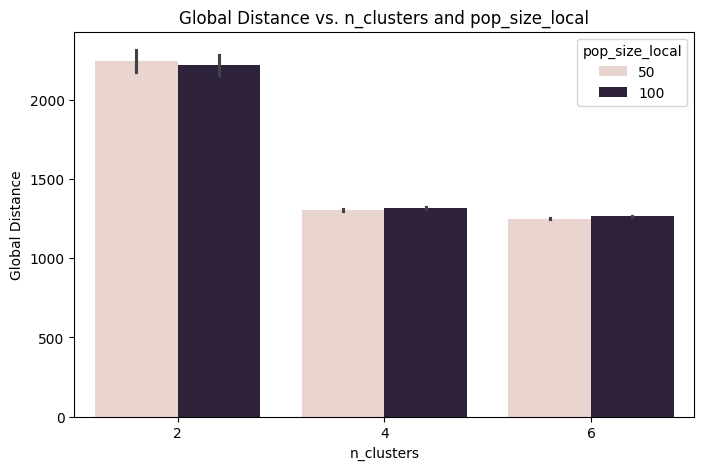

In [12]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=df_results, 
            x="n_clusters", 
            y="global_distance", 
            hue="pop_size_local")
plt.title("Global Distance vs. n_clusters and pop_size_local")
plt.xlabel("n_clusters")
plt.ylabel("Global Distance")
plt.show()

We might also check differences by `max_gen_local`:

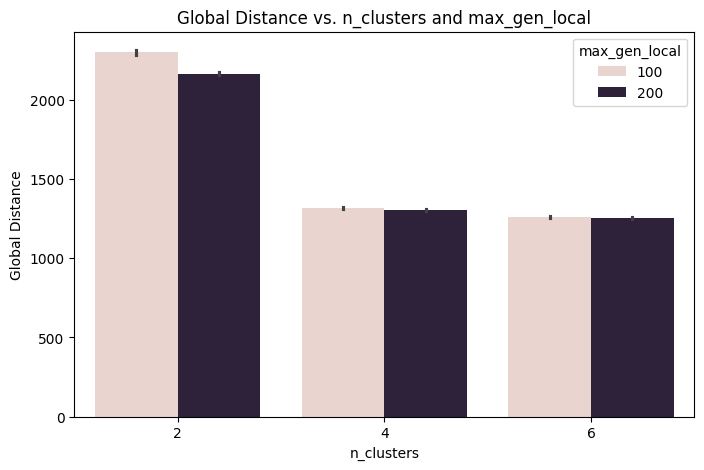

In [13]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_results, 
            x="n_clusters", 
            y="global_distance", 
            hue="max_gen_local")
plt.title("Global Distance vs. n_clusters and max_gen_local")
plt.xlabel("n_clusters")
plt.ylabel("Global Distance")
plt.show()

## 4. Observations

1. As we increase the number of clusters, sub-region TSPs become smaller, but we might incur extra travel between clusters. There's often an optimal range for `n_clusters`.
2. Increasing `pop_size_local` or `max_gen_local` can improve the local TSP solutions, potentially improving the overall route.
3. The overall route distance is still a heuristic approach (clustering first, then local TSP). For even better results, we could refine the cluster boundaries or introduce a more advanced approach.
